# Prepare for a table to build a classification model

(1) It might be difficult to find a regression relationship to link nutrient pulses event with wind speed or tidal height because nutrients pulses were not proportional to those parameters, i.e., large pulses or small pulses occur randomly.

(2) Classification matrix approach might be better. For example, combining wind, precipitation, net water volume fluxes as matrix, then try yes or no

(3) Prepare a table that has bottom nutrient as a target, append with all the associated parameters, including the time, water level, water volume fluxes,wind speed, wind_direction, accumulated wind speed during that 1-3 days window.

To do list:
* Extract the discrete sampling time from YSI profile (VP_NYCC2020) and then go to Mooring (find the Total_Depth_NY_2020, and Depth_YSI_corrected_NY_2020) and extract water depths associated to the sampling time
* Extract the wind speed and direction at the discrete sampling time
* Extract the water volume fluxes at the discrete sampling time
* Extract 1-day window, 2-days window, 3-day window for all the parameters listed above
* Extract the maximum water depth and minimum water depth during that 1-/2-/3-days window
* Extract the maximum water fluxes and minimum water fluxes during that 1-/2-/3-days window
* Calculate the accumulated fluxes, accumulated wind speed, and accumulated wind direction during that 1-/2-/3-/days window

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from datetime import datetime

### Import data

In [2]:
# import extracted water flux 2020 data
infile = '../data/processed/Extract_waterflux_2020.csv'
flux = pd.read_csv(infile,  parse_dates=['Datetime_0day','Datetime_1day','Datetime_2day'], infer_datetime_format=True, sep=',')
flux

,Datetime_0day,Datetime_1day,Datetime_2day,WaterFlux_extract_0day,WaterFlux_extract_1day,WaterFlux_extract_2day
0,2020-06-01 00:01:00,2020-05-31 00:01:00,2020-05-30 00:01:00,298.898599,421.794626,491.842734
1,2020-06-01 00:16:00,2020-05-31 00:16:00,2020-05-30 00:16:00,339.685887,446.613348,359.345557
2,2020-06-01 00:31:00,2020-05-31 00:31:00,2020-05-30 00:31:00,381.614007,451.762299,369.648901
3,2020-06-01 00:46:00,2020-05-31 00:46:00,2020-05-30 00:46:00,405.232981,456.911251,258.638029
4,2020-06-01 01:01:00,2020-05-31 01:01:00,2020-05-30 01:01:00,429.503942,451.654614,295.170969
...,...,...,...,...,...,...
4987,2020-10-07 22:46:00,2020-10-06 22:46:00,2020-10-05 22:46:00,270.077209,279.857533,272.616838
4988,2020-10-07 23:01:00,2020-10-06 23:01:00,2020-10-05 23:01:00,291.731748,271.164824,229.919269
4989,2020-10-07 23:16:00,2020-10-06 23:16:00,2020-10-05 23:16:00,303.933474,241.082590,186.621267
4990,2020-10-07 23:31:00,2020-10-06 23:31:00,2020-10-05 23:31:00,306.374238,199.864048,153.964513


In [3]:
# import extracted water level (tide height) 2020 data
infile = '../data/processed/Extract_water_level_NY_2020.csv'
WL = pd.read_csv(infile,  parse_dates=['Date_NY_2020_0day','Date_NY_2020_1day','Date_NY_2020_2day'], infer_datetime_format=True, sep=',')
WL

,Date_NY_2020_0day,Date_NY_2020_1day,Date_NY_2020_2day,tide_0day,tide_1day,tide_2day
0,2020-06-01 00:01:00,2020-05-31 00:01:00,2020-05-30 00:01:00,0.40,0.60,0.79
1,2020-06-01 00:16:00,2020-05-31 00:16:00,2020-05-30 00:16:00,0.44,0.65,0.85
2,2020-06-01 00:31:00,2020-05-31 00:31:00,2020-05-30 00:31:00,0.48,0.70,0.89
3,2020-06-01 00:46:00,2020-05-31 00:46:00,2020-05-30 00:46:00,0.52,0.75,0.92
4,2020-06-01 01:01:00,2020-05-31 01:01:00,2020-05-30 01:01:00,0.57,0.80,0.96
...,...,...,...,...,...,...
4987,2020-10-07 22:46:00,2020-10-06 22:46:00,2020-10-05 22:46:00,0.54,0.88,1.12
4988,2020-10-07 23:01:00,2020-10-06 23:01:00,2020-10-05 23:01:00,0.58,0.91,1.15
4989,2020-10-07 23:16:00,2020-10-06 23:16:00,2020-10-05 23:16:00,0.62,0.94,1.18
4990,2020-10-07 23:31:00,2020-10-06 23:31:00,2020-10-05 23:31:00,0.66,0.97,1.20


In [4]:
# import extracted water level (tide height) 2020 data
infile = '../data/processed/Extract_wind_2020.csv'
wind = pd.read_csv(infile,  parse_dates=['Datetime_0day','Datetime_1day','Datetime_2day'], infer_datetime_format=True, sep=',')
wind

,Datetime_0day,Datetime_1day,Datetime_2day,WS_extract_0day,WD_extract_0day,WS_extract_1day,WD_extract_1day,WS_extract_2day,WD_extract_2day
0,2020-06-01 00:59:00,2020-05-31 00:59:00,2020-05-30 00:59:00,0,0,0,0,8,220
1,2020-06-01 01:59:00,2020-05-31 01:59:00,2020-05-30 01:59:00,7,110,3,280,7,230
2,2020-06-01 02:59:00,2020-05-31 02:59:00,2020-05-30 02:59:00,0,0,11,360,9,240
3,2020-06-01 03:59:00,2020-05-31 03:59:00,2020-05-30 03:59:00,5,280,17,360,7,230
4,2020-06-01 04:59:00,2020-05-31 04:59:00,2020-05-30 04:59:00,8,340,21,10,7,230
...,...,...,...,...,...,...,...,...,...
1243,2020-10-07 19:59:00,2020-10-06 19:59:00,2020-10-05 19:59:00,8,230,8,200,0,0
1244,2020-10-07 20:59:00,2020-10-06 20:59:00,2020-10-05 20:59:00,9,210,6,180,0,0
1245,2020-10-07 21:59:00,2020-10-06 21:59:00,2020-10-05 21:59:00,9,240,6,190,0,0
1246,2020-10-07 22:59:00,2020-10-06 22:59:00,2020-10-05 22:59:00,11,260,9,200,0,0


In [5]:
# fill data gaps
wind['WS_extract_0day'].fillna(method='ffill',inplace=True)
wind['WD_extract_0day'].fillna(method='ffill',inplace=True)
# create vector
cos_WindDir = np.deg2rad(wind['WD_extract_0day'])
sin_WindDir= np.deg2rad(wind['WD_extract_0day'])
U_wind=wind['WS_extract_0day']*0.44704*np.cos(cos_WindDir)
V_wind=wind['WS_extract_0day']*0.44704*np.sin(sin_WindDir)

* Calculate accumulated (net) water flux in 0-day, 1-day, 2-day window
* Calculate accumulated (net) wind speed in 0-day, 1-day, 2-day window
* Calculate accumulated (net) wind speed in 0-day, 1-day, 2-day window

In [6]:
Water_flux_0day_accum= flux.groupby(flux['Datetime_0day'].dt.date)['WaterFlux_extract_0day'].sum()
Water_flux_1day_accum= flux.groupby(flux['Datetime_1day'].dt.date)['WaterFlux_extract_1day'].sum()
Water_flux_2day_accum= flux.groupby(flux['Datetime_2day'].dt.date)['WaterFlux_extract_2day'].sum()

In [7]:
WL_0day_accum= WL.groupby(WL['Date_NY_2020_0day'].dt.date)['tide_0day'].sum()
WL_1day_accum= WL.groupby(WL['Date_NY_2020_1day'].dt.date)['tide_1day'].sum()
WL_2day_accum= WL.groupby(WL['Date_NY_2020_2day'].dt.date)['tide_2day'].sum()

In [8]:
WS_0day_accum= wind.groupby(wind['Datetime_0day'].dt.date)['WS_extract_0day'].sum()
WS_1day_accum= wind.groupby(wind['Datetime_1day'].dt.date)['WS_extract_1day'].sum()
WS_2day_accum= wind.groupby(wind['Datetime_2day'].dt.date)['WS_extract_2day'].sum()

In [9]:
WD_0day_accum= wind.groupby(wind['Datetime_0day'].dt.date)['WD_extract_0day'].sum()
WD_1day_accum= wind.groupby(wind['Datetime_1day'].dt.date)['WD_extract_1day'].sum()
WD_2day_accum= wind.groupby(wind['Datetime_2day'].dt.date)['WD_extract_2day'].sum()

In [10]:
# Load nutrient data, there are 3 depths (surface, intermediate, and bottom depth), 'D3_NH4_NY' means NH4 concentration at the 3rd depth, which is the bottom depth
infile = '../data/processed/Nutrient_2020_V4.csv'
nuts = pd.read_csv(infile, usecols=['Date_Time_NYCC', 'D2_N+N_NY', 'D3_N+N_NY','D2_NH4_NY', 'D3_NH4_NY'], parse_dates=['Date_Time_NYCC'], infer_datetime_format=True, sep=',')

# select the dateTime range
nuts = nuts[nuts.Date_Time_NYCC > pd.Timestamp('2020-05-31 23:59:00')]
nuts = nuts[nuts.Date_Time_NYCC < pd.Timestamp('2020-10-08 00:59:00')]
nuts

,Date_Time_NYCC,D2_N+N_NY,D3_N+N_NY,D2_NH4_NY,D3_NH4_NY
0,2020-06-01 13:40:00,4.18,2.50,5.86,6.05
1,2020-06-03 13:25:00,0.52,0.38,5.27,5.54
2,2020-06-05 13:47:00,1.06,1.08,5.05,4.77
3,2020-06-08 13:36:00,0.87,1.41,4.74,5.32
4,2020-06-10 14:32:00,0.88,1.04,5.92,5.44
5,2020-06-12 12:25:00,NaN,3.26,5.49,4.57
6,2020-06-15 12:18:00,2.30,2.28,2.90,4.99
7,2020-06-17 12:16:00,NaN,2.91,11.44,11.59
8,2020-06-19 12:23:00,3.19,3.58,13.42,14.34
9,2020-06-22 13:14:00,NaN,3.55,NaN,0.01


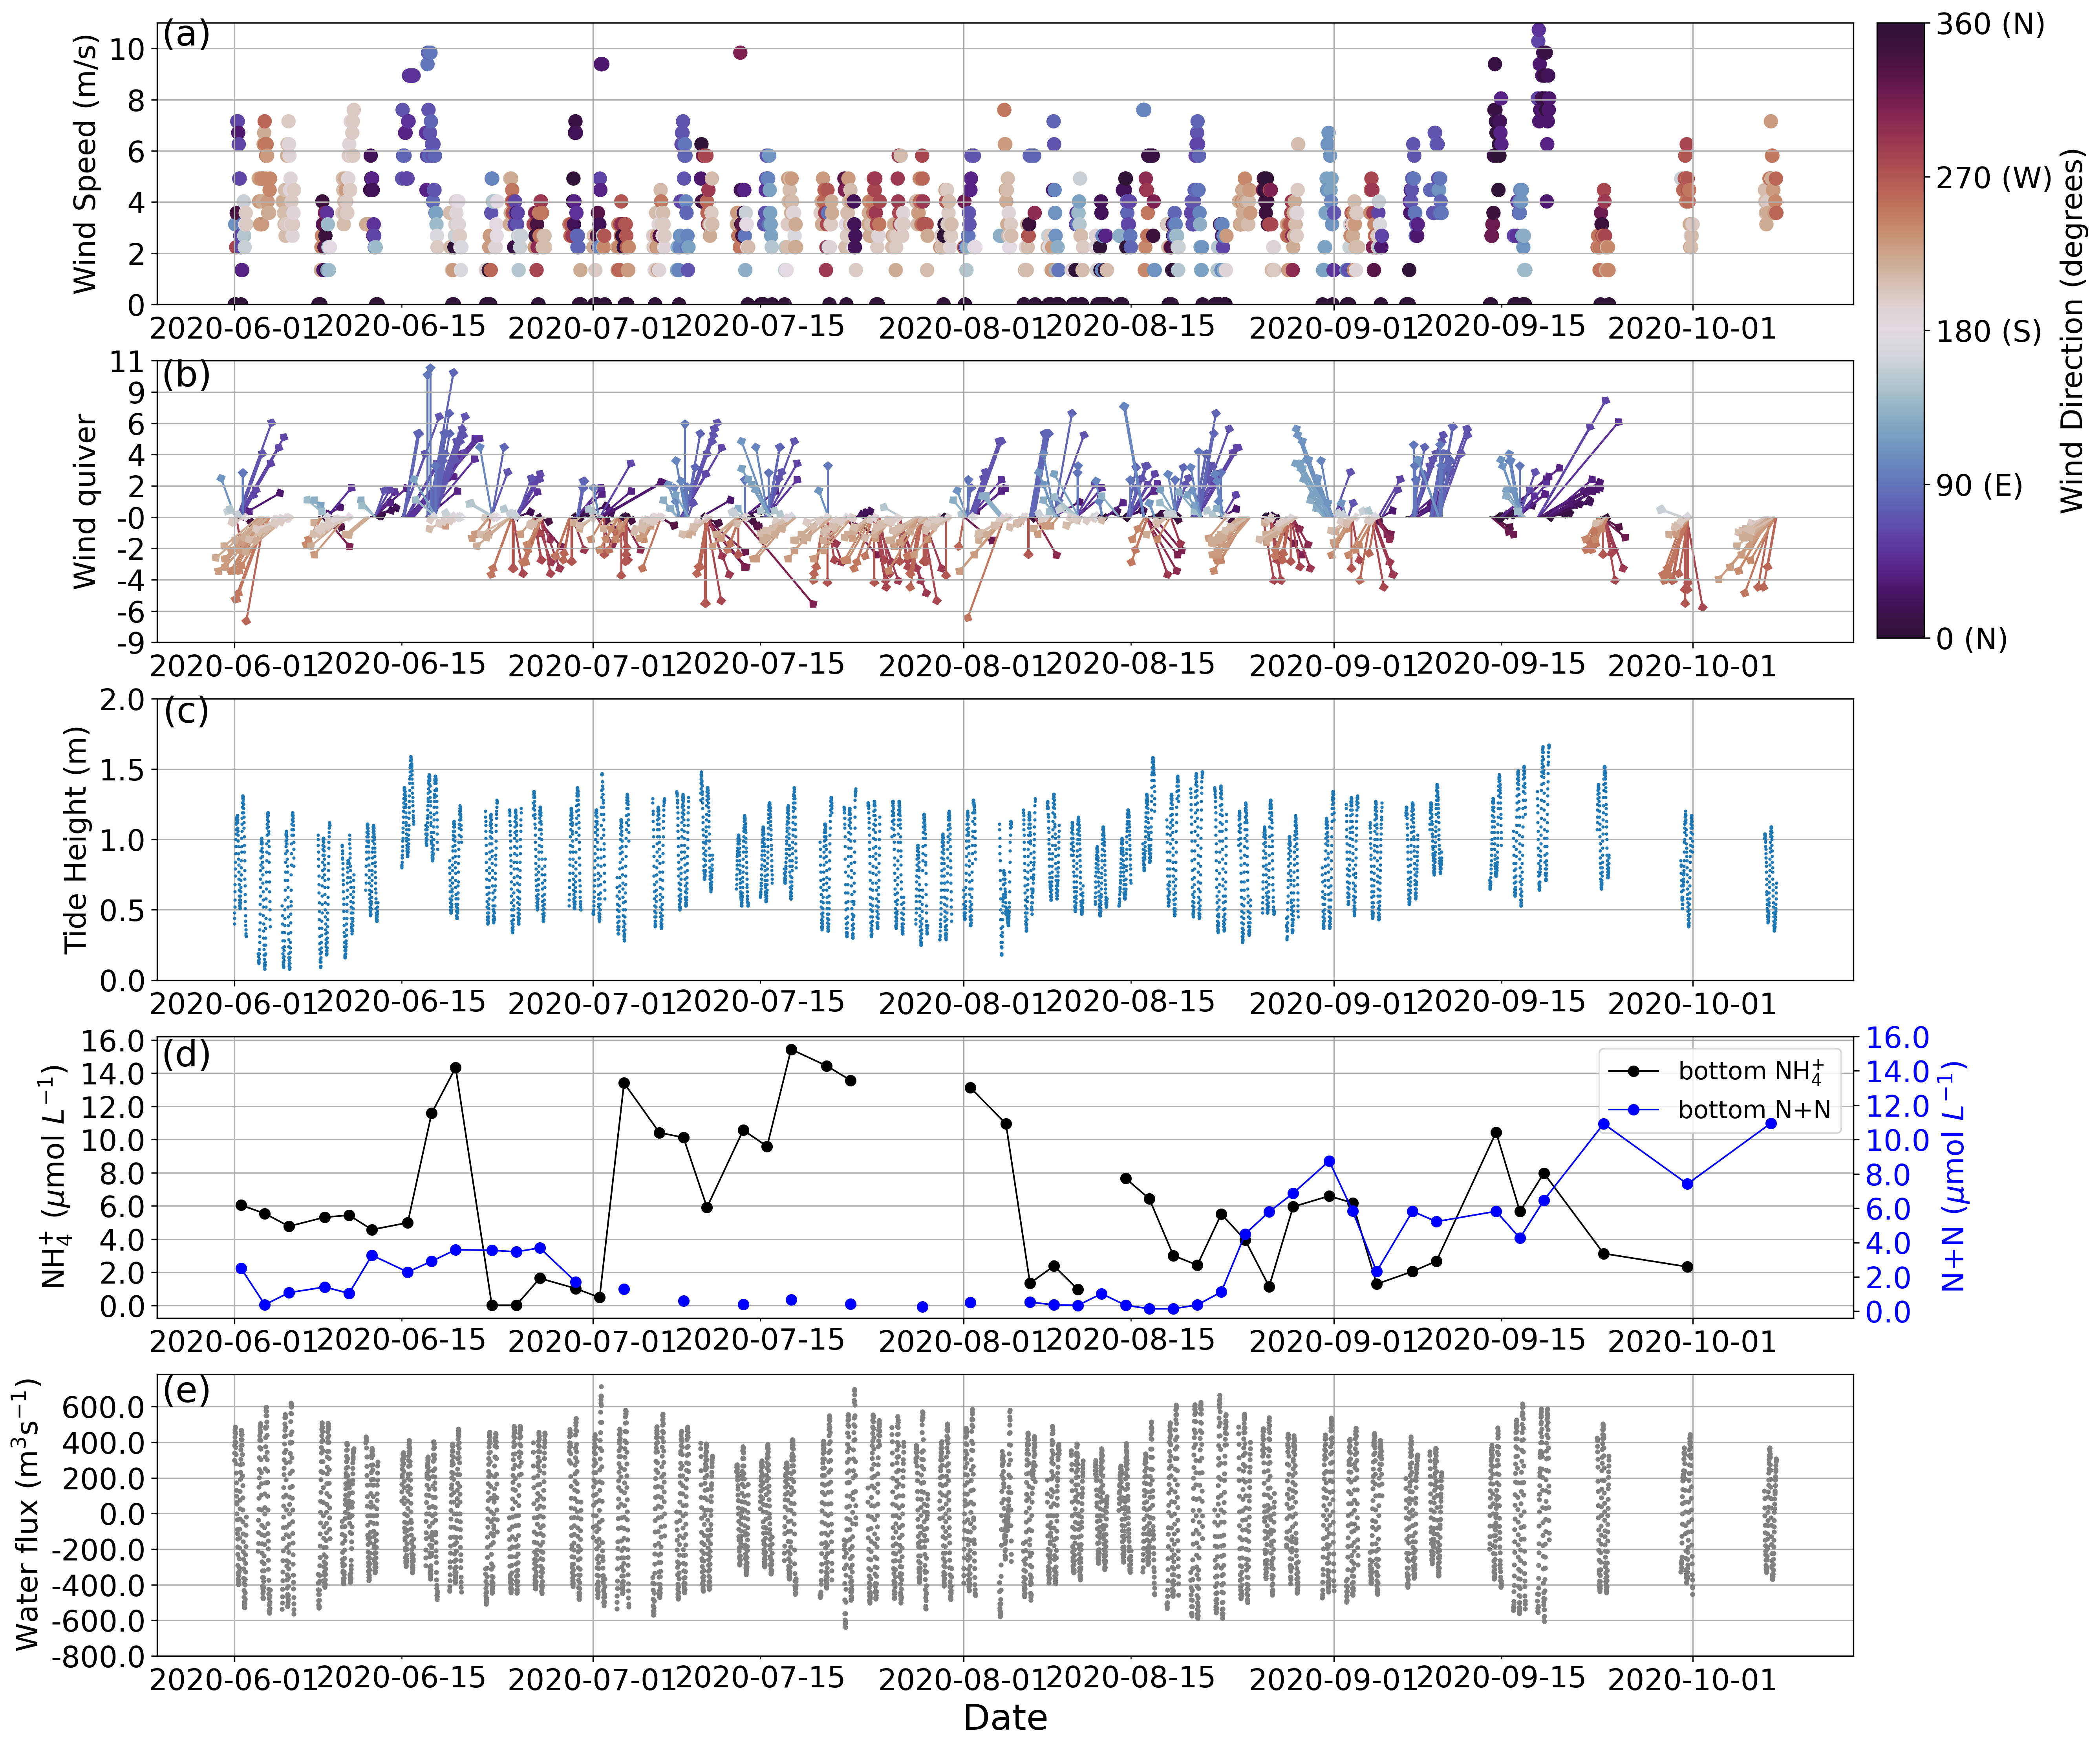

In [11]:
fig, ax = plt.subplots(5, 1, figsize=(20, 18),dpi = 300, sharex=True)


# subplot 1, using a circular colormap based on wind direction
cmap = plt.colormaps.get_cmap('twilight_shifted')
norm = plt.Normalize(vmin=0, vmax=360)
# Plot the time-series wind speed, using color to indicate direction
scatter=ax[0].scatter(wind['Datetime_0day'], wind['WS_extract_0day']*0.44704, c=wind['WD_extract_0day'],  s=60, cmap=cmap, norm=norm)
# create a separate axis object for the colorbar
cbar_ax = fig.add_axes([0.88, 0.59, 0.02, 0.29], anchor="C", zorder=20)
# add the colorbar to the figure
cbar = plt.colorbar(scatter, cbar_ax)
# show 5 ticks on the colorbar
cbar.set_ticks([0, 90, 180, 270, 360])
cbar.set_ticklabels(['0 (N)', '90 (E)', '180 (S)', '270 (W)','360 (N)'])
cbar.set_label('Wind Direction (degrees)',fontsize=18)
cbar.ax.tick_params(labelsize=18)
# adjust the subplot and colorbar positions as needed
fig.subplots_adjust(left=0.15, right=0.87, wspace=0.3)
ax[0].set_ylabel('Wind Speed (m/s)',fontsize=18)
ax[0].set_ylim(0,11)
WindSpeed = wind['WS_extract_0day']*0.44704
y_ticks =np.arange(0,np.max(WindSpeed),2)
y_tick_labels = ['{:.0f}'.format(t) for t in y_ticks]
ax[0].set_yticks(y_ticks, y_tick_labels, fontsize = 18)
ax[0].text(mdates.date2num(datetime(2020, 5, 28)), 10.5, "(a)", fontsize=22, ha="center", va="center")
ax[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
date_fmt = mdates.DateFormatter('%Y-%m-%d')
ax[0].xaxis.set_major_formatter(date_fmt)
ax[0].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
month_locator = mdates.MonthLocator()
day_locator = mdates.DayLocator(bymonthday=[1, 15])
ax[0].xaxis.set_major_locator(month_locator)
ax[0].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(ax[0].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=18)
ax[0].grid(True)

# subplot 2
y = np.zeros(len(wind['Datetime_0day']))
# Convert wind directions to colors by normalize it unto the color pallet
norm = mcolors.Normalize(vmin=0, vmax=360)
colors = plt.cm.twilight_shifted(norm(wind['WD_extract_0day']))
ax[1].quiver(wind['Datetime_0day'], y, U_wind, V_wind, color= colors, scale=10, scale_units='xy', width=0.0012, headwidth=5, headlength=2)
# Set y-axis tick labels to correspond to true wind speed
y_ticks = np.arange(-(np.ceil(np.max(y))+0.8), np.ceil(np.max(y))+1.1, 0.2)
y_tick_labels = ['{:.0f}'.format(WindSpeed.max() * t) for t in y_ticks]
ax[1].set_yticks(y_ticks, y_tick_labels, fontsize = 18)
ax[1].set_ylabel('Wind quiver',fontsize=18)
ax[1].text(mdates.date2num(datetime(2020, 5, 28)), 0.9, "(b)", fontsize=22, ha="center", va="center")
ax[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
ax[1].xaxis.set_major_formatter(date_fmt)
ax[1].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
ax[1].xaxis.set_major_locator(month_locator)
ax[1].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(ax[1].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=18)
ax[1].grid(True)

# subplot 3, Tide height
ax[2].plot(WL['Date_NY_2020_0day'], WL['tide_0day'], marker ='o', markersize = 1, linestyle='-', linewidth=0)

ax[2].set_ylabel('Tide Height (m)',fontsize=18)
# Set y-axis tick labels to correspond to tide
y_ticks = np.arange(0, np.ceil(np.max(WL['tide_0day']))+0.5, 0.5)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
ax[2].set_yticks(y_ticks, y_tick_labels, fontsize = 18 )
ax[2].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
ax[2].xaxis.set_major_formatter(date_fmt)
ax[2].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
ax[2].xaxis.set_major_locator(month_locator)
ax[2].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(ax[2].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=18)
ax[2].text(mdates.date2num(datetime(2020, 5, 28)), 1.9, "(c)", fontsize=22, ha="center", va="center")
ax[2].grid(True)

# subplot 4
ax3 = ax[3].twinx() # have two y axis
l1= ax[3].plot(nuts['Date_Time_NYCC'], nuts['D3_NH4_NY'], marker ='o', markersize = 6, linestyle='-', linewidth=1, color='black',label ='bottom NH$_4^{+}$')

ax[3].set_ylabel('NH$_4^{+}$ ($\mu$mol $L^{-1}$)',fontsize=18)
y_ticks = np.arange(0, np.ceil(np.max(nuts['D3_NH4_NY']))+0.5, 2)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
ax[3].set_yticks(y_ticks, y_tick_labels, fontsize=18)

l2= ax3.plot(nuts['Date_Time_NYCC'], nuts['D3_N+N_NY'], marker ='o', markersize = 6, linestyle='-', linewidth=1, color='blue', label='bottom N+N')

ax3.set_ylabel('N+N ($\mu$mol $L^{-1}$)', color='blue', fontsize=18)
y_ticks = np.arange(0, np.ceil(np.max(nuts['D3_NH4_NY']))+2, 2)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
ax3.set_yticks(y_ticks, y_tick_labels, fontsize=18 )
ax3.tick_params(axis='y', labelcolor='blue')
ax[3].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

ax[3].xaxis.set_major_formatter(date_fmt)
ax[3].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
ax[3].xaxis.set_major_locator(month_locator)
ax[3].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(ax[3].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=18)
ax[3].text(mdates.date2num(datetime(2020, 5, 28)), 15, "(d)", fontsize=22, ha="center", va="center")
# combine the legends for both y-axes
lines, labels = ax[3].get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax[3].legend(lines + lines2, labels + labels2, fontsize=15, loc='upper right')

ax[3].grid(True)

# subplot 5, water fluxes
ax[4].plot(flux['Datetime_0day'], flux['WaterFlux_extract_0day'], marker ='o', markersize = 2, linestyle='-', color='gray',linewidth=0)
ax[4].set_ylabel('Water flux (m$^{3}$s$^{-1}$)',fontsize=18)
# Set y-axis tick labels to correspond to tide
y_ticks = np.arange(-800, 800, 200)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
ax[4].set_yticks(y_ticks, y_tick_labels, fontsize = 18 )
ax[4].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
ax[4].xaxis.set_major_formatter(date_fmt)
ax[4].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
ax[4].xaxis.set_major_locator(month_locator)
ax[4].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(ax[4].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=18)
ax[4].text(mdates.date2num(datetime(2020, 5, 28)), 680, "(e)", fontsize=22, ha="center", va="center")
ax[4].set_xlabel('Date',fontsize=22)
ax[4].grid(True)

# show plot
plt.show()

### Now save the table with discrete nutrient samples, accumulated water fluxes, wind speed and direction, tide height

In [12]:
# stack nutrient data with accumulated water fluxes, tide height, wind speed and wind direction, side by side into PandaFrame
data_combined = pd.concat([Water_flux_0day_accum,WL_0day_accum, WS_0day_accum, WD_0day_accum], axis=1,join='outer')
data_combined = data_combined.reset_index()

#nuts['Date_Time_NYCC'] = pd.to_datetime(nuts['Date_Time_NYCC'])
# Concatenate the two dataframes along the rows axis
result = pd.concat([nuts, data_combined], axis=1)
result = result.rename(columns={'index': 'Date'})
result = result.reset_index()
# Save the combined data to a new CSV file
result.to_csv(r'../data/processed/Nuts_waterflux_tide_wind_data.csv')

### Examining hydrostatic pressure based on net fluxes between Elizabeth River and Lafayette river

（1） Check tidal fluxes when nutrient pulses occur, and check the net water volume fluxes during that three days window, see if more fluxes go out, (if more water leaving the system, then hydrostatic pressure between sediment and water was alleviated, might induce more nutrients released from the sediment)

（2） Check the tide height during that nutrient pulses, see if it is more build up or leaving more during nutrient pulses events (this is eventually again fluxes)

